In [228]:
import pandas as pd
import matplotlib.pyplot as plt

df1 = pd.read_csv("1.csv")
df2 = pd.read_csv("2.csv")
df3 = pd.read_csv("3.csv")
df4 = pd.read_csv("4.csv")
df5 = pd.read_csv("5.csv")
df = pd.concat([df1, df2, df3, df4, df5])
df.head()
 

,date,state,district,pincode,demo_age_5_17,demo_age_17_
0,01-03-2025,Uttar Pradesh,Gorakhpur,273213,49,529
1,01-03-2025,Andhra Pradesh,Chittoor,517132,22,375
2,01-03-2025,Gujarat,Rajkot,360006,65,765
3,01-03-2025,Andhra Pradesh,Srikakulam,532484,24,314
4,01-03-2025,Rajasthan,Udaipur,313801,45,785


In [ ]:

# Add the 2 columns into a new column 'total'
df['total'] = df['demo_age_17_']  #data for adults
df['total2'] = df['demo_age_5_17'] #data for minors
df['total3'] = df['total'] + df['total2'] #total count
df['state'] = df['state'].str.strip().str.title()


In [ ]:
import pandas as pd

#this part is to correct the mistakes in the data and clean it
state_corrections = {
    # Typos and Variations for West Bengal
    'West Bengli': 'West Bengal',
    'West  Bengal': 'West Bengal',
    'Westbengal': 'West Bengal',
    'West Bangal': 'West Bengal',
    
    # Typos for Chhattisgarh
    'Chhatisgarh': 'Chhattisgarh',
    
    # Old Names
    'Orissa': 'Odisha',
    'Uttaranchal': 'Uttarakhand',
    'Pondicherry': 'Puducherry',
    
    # Standardization (e.g., using "And" instead of "&")
    'Jammu & Kashmir': 'Jammu And Kashmir',
    'Andaman & Nicobar Islands': 'Andaman And Nicobar Islands',
    
    # Merging Union Territories (Dadra & Nagar Haveli and Daman & Diu)
    'Dadra & Nagar Haveli': 'Dadra And Nagar Haveli And Daman And Diu',
    'Dadra And Nagar Haveli': 'Dadra And Nagar Haveli And Daman And Diu',
    'Daman & Diu': 'Dadra And Nagar Haveli And Daman And Diu',
    'Daman And Diu': 'Dadra And Nagar Haveli And Daman And Diu',
    'Dadra and Nagar Haveli and Daman and Diu': 'Dadra And Nagar Haveli And Daman And Diu',
    
    # Mapping Cities to their States
    'Nagpur': 'Maharashtra',
    'Jaipur': 'Rajasthan',
    'Darbhanga': 'Bihar',
    'Madanapalle': 'Andhra Pradesh',
    'Puttenahalli': 'Karnataka',
    'Balanagar': 'Telangana',
    'Raja Annamalai Puram': 'Tamil Nadu'
}

# 5. Apply the corrections
df['state'] = df['state'].replace(state_corrections)

# 6. Remove invalid entries (like '100000')
df = df[df['state'] != '100000']

# 7. Group by the cleaned state and sum the entrants
state_data = df.groupby('state')['total'].sum().sort_values(ascending=False).reset_index()
state_data2 = df.groupby('state')['total2'].sum().sort_values(ascending=False).reset_index()

#creating 2 data frames for adults and minors and sorting them by state name
total_data = state_data #adult data
total_data2 = state_data2 #minor data
total_data = total_data.sort_values(by='state')
total_data = total_data.reset_index(drop=True)
total_data2 = total_data2.sort_values(by='state')
total_data2 = total_data2.reset_index(drop=True)
total_data2.head()

,state,total2
0,Andaman And Nicobar Islands,617
1,Andhra Pradesh,321148
2,Arunachal Pradesh,5783
3,Assam,84480
4,Bihar,380023


In [ ]:
#using statewise population data from an online data set to calculate percentage of aadhar linked population
df_pop = pd.read_csv("states.csv")
df_pop = df_pop.sort_values(by='Name')
df_pop = df_pop.reset_index(drop=True)
total_data['population'] = df_pop['Population']

#calculating percentage of demographic updates with respect to population
total_data['percentage'] = (total_data['total']*100.0)/total_data['population']
total_data.head()
total_data = total_data.sort_values(by='percentage')
total_data = total_data.reset_index(drop=True)

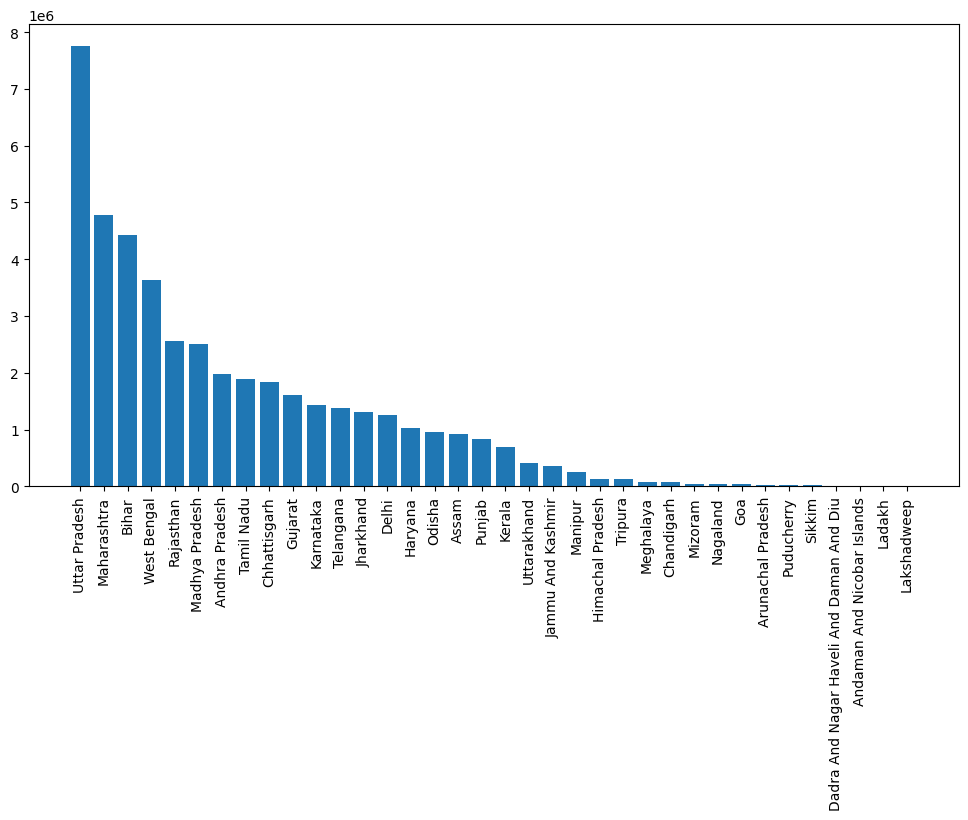

In [ ]:
#plotting statewise adult demographic updates
plt.figure(figsize=(12, 6))
total_data = total_data.sort_values(by='total',ascending=False)
plt.bar(total_data['state'], total_data['total'])
plt.xticks(rotation=90)
plt.show()

In [276]:
#manipur analysis
df_manipur = df[df['state'] == 'Manipur']
df_manipur_districts = df_manipur.groupby('district')['total'].sum().sort_values(ascending=False).reset_index()


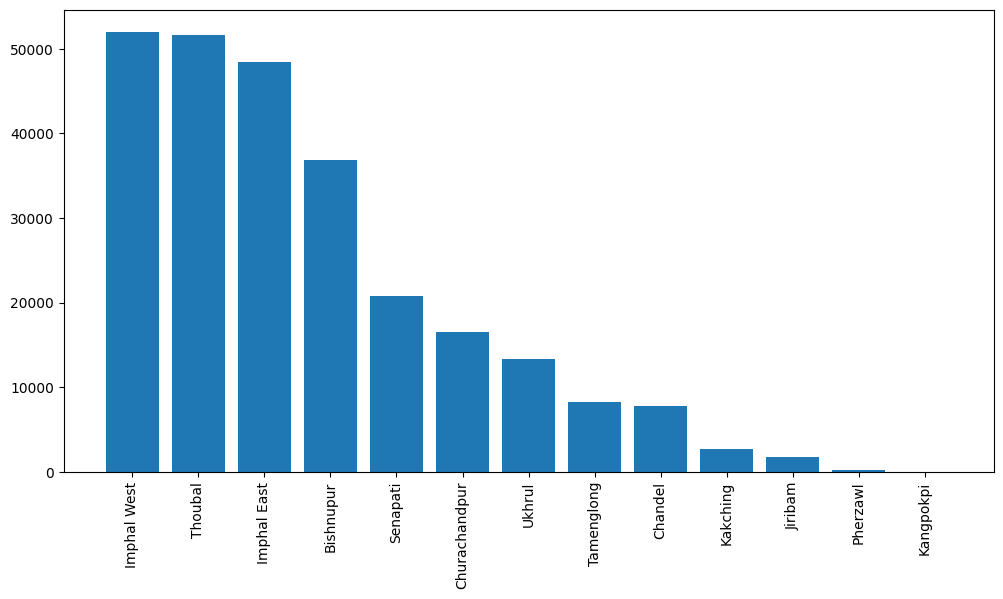

In [ ]:
#plotting districtwise demographic updates for Manipur
plt.figure(figsize=(12, 6))
df_manipur_districts = df_manipur_districts.sort_values(by='total',ascending=False)
plt.bar(df_manipur_districts['district'], df_manipur_districts['total'])
plt.xticks(rotation=90)
plt.show()

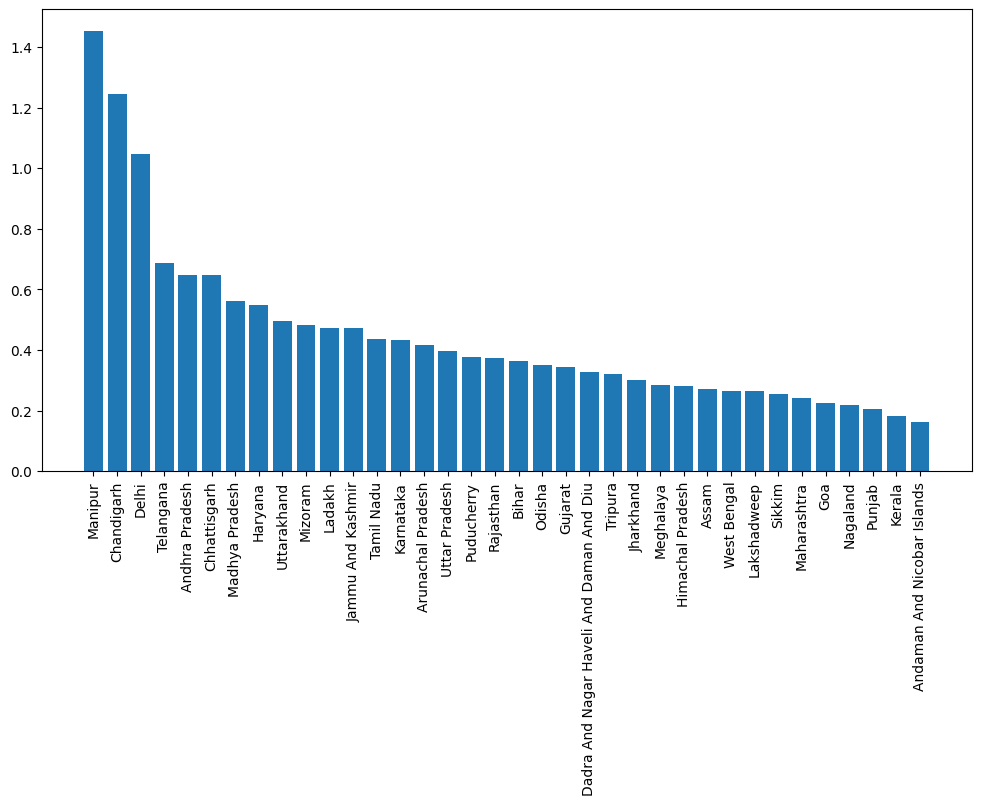

In [ ]:

#plotting statewise minor demographic updates by percentage
total_data2['percentage2'] = (total_data2['total2']*100.0)/df_pop['Population']
total_data2.head()
total_data2 = total_data2.sort_values(by='percentage2',ascending=False)
total_data2 = total_data2.reset_index(drop=True)
plt.figure(figsize=(12, 6))
plt.bar(total_data2['state'], total_data2['percentage2'])
plt.xticks(rotation=90)
plt.show()

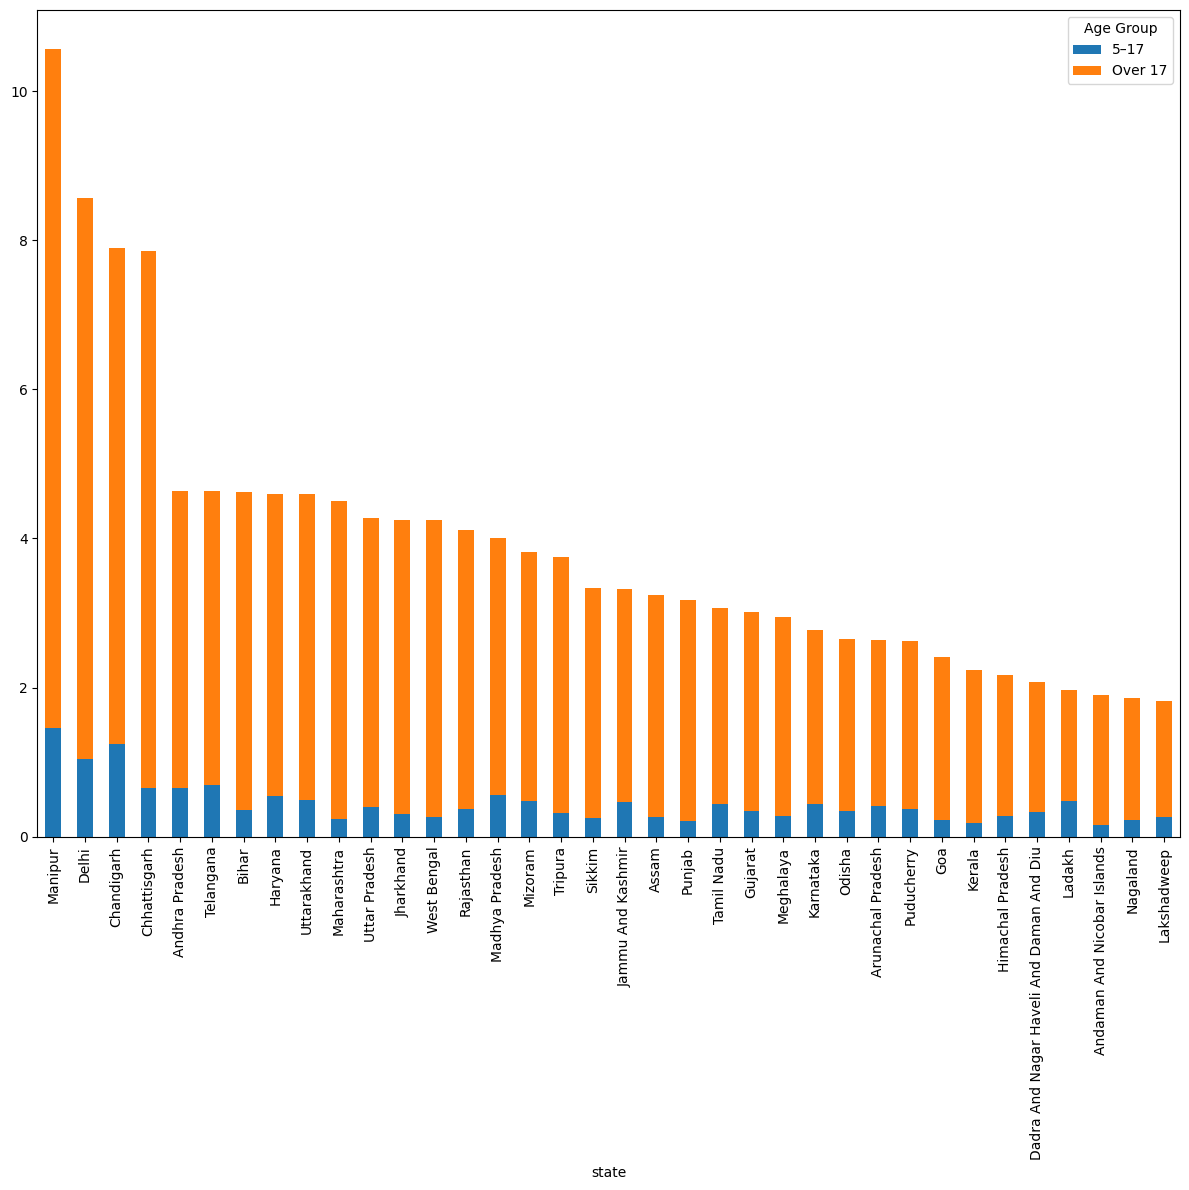

In [ ]:


#plotting stacked bar chart for minor(5-17) and adult(over 17) demographic updates percentage wise
total_data = total_data.sort_values(by='state').reset_index(drop=True)
total_data2 = total_data2.sort_values(by='state').reset_index(drop=True)
stacked_df = pd.DataFrame({
    'state': total_data['state'],
    '5–17': total_data2['percentage2'],
    'Over 17': total_data['percentage']
})

stacked_df['total'] = stacked_df['5–17'] + stacked_df['Over 17']

stacked_df = stacked_df.sort_values(by='total', ascending=False)
stacked_df.set_index('state')[['5–17', 'Over 17']].plot(
    kind='bar',
    stacked=True,
    figsize=(12,12)
)
plt.xticks(rotation=90)
plt.legend(title="Age Group")
plt.tight_layout()
plt.show()


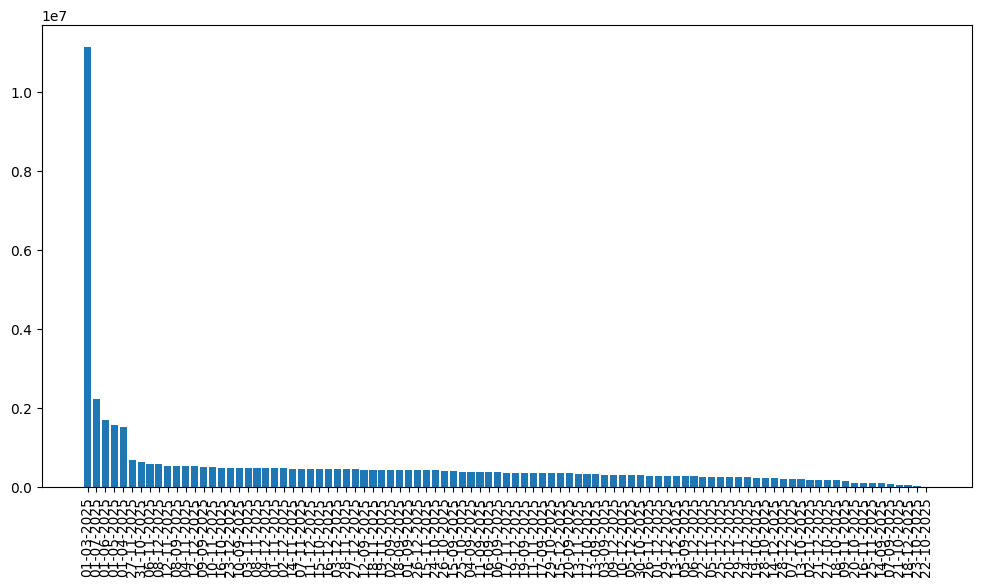

Number of unique dates in the dataset: 95


In [ ]:
#plotting time series analysis of total demographic updates

time_data = df.groupby('date')['total3'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12, 6))
plt.bar(time_data['date'], time_data['total3'])
plt.xticks(rotation=90)
plt.show()
unique_dates = df['date'].nunique()
print(f"Number of unique dates in the dataset: {unique_dates}")

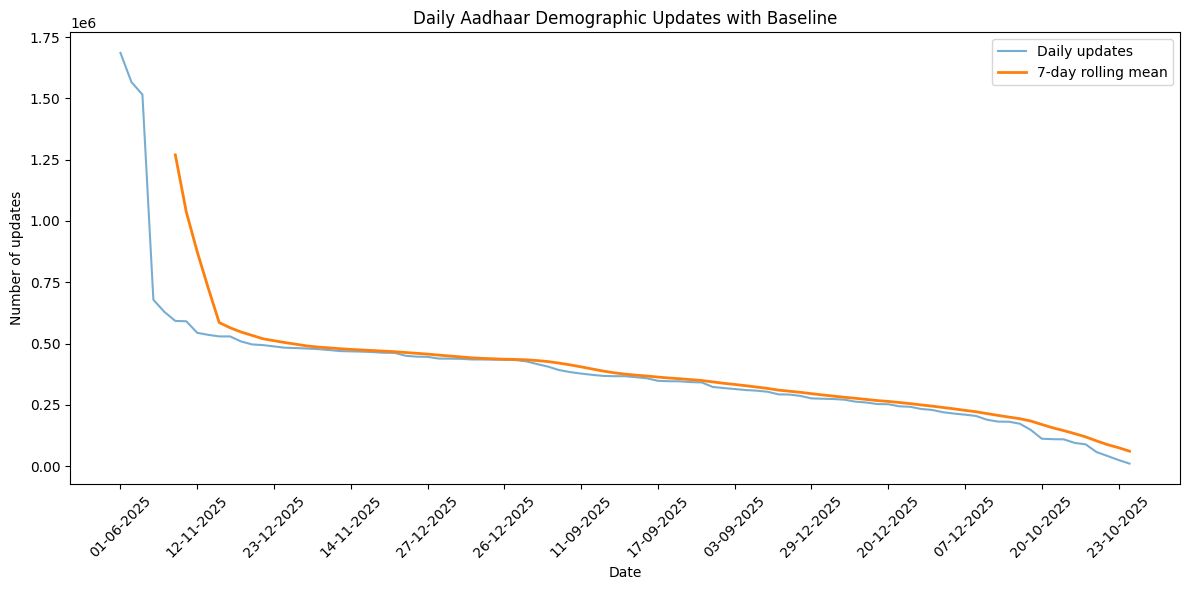

In [ ]:
#plotting deviation of updates from baseline using rolling mean
#note:  the first date is ignored to normalise the data a bit due to the very high initial spike
time_data['rolling'] = time_data['total3'].rolling(7).mean()
time_data['deviation'] = time_data['total3'] - time_data['rolling']
time_data = time_data.iloc[1:]

plt.figure(figsize=(12, 6))
plt.plot(time_data['date'], time_data['total3'], label='Daily updates', alpha=0.6)
plt.plot(time_data['date'], time_data['rolling'], label='7-day rolling mean', linewidth=2)

plt.xlabel('Date')
plt.ylabel('Number of updates')
plt.title('Daily Aadhaar Demographic Updates with Baseline')
plt.legend()
plt.xticks(rotation=45)
plt.xticks(time_data['date'][::7], rotation=45)


plt.tight_layout()
plt.show()



Index(['state', 'total', 'Population', 'per_1000'], dtype='object')


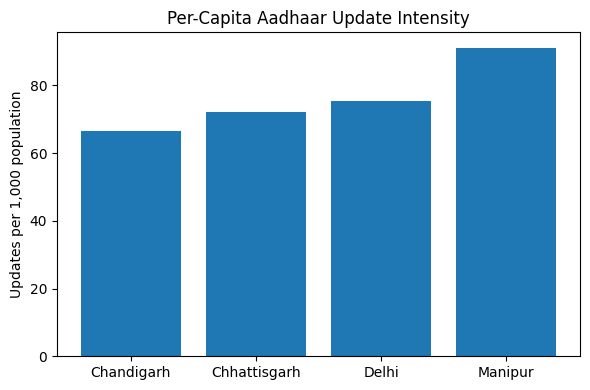

In [ ]:
#plotting per capita demographic updates for the 4 highest states percentage wise with respect to population

states_focus = ['Manipur', 'Delhi', 'Chandigarh', 'Chhattisgarh']
state_totals = (
    df[df['state'].isin(states_focus)]
    .groupby('state')['total']
    .sum()
    .reset_index()
)
state_totals = state_totals.merge(
    df_pop[['Name', 'Population']],
    left_on='state',
    right_on='Name',
    how='left'
)
state_totals = state_totals.drop(columns=['Name'])

state_totals['per_1000'] = (
    state_totals['total'] / state_totals['Population'] * 1000
)
print(state_totals.columns)

plt.figure(figsize=(6, 4))

plt.bar(
    state_totals['state'],
    state_totals['per_1000']
)

plt.ylabel('Updates per 1,000 population')
plt.title('Per-Capita Aadhaar Update Intensity')

plt.tight_layout()
plt.show()

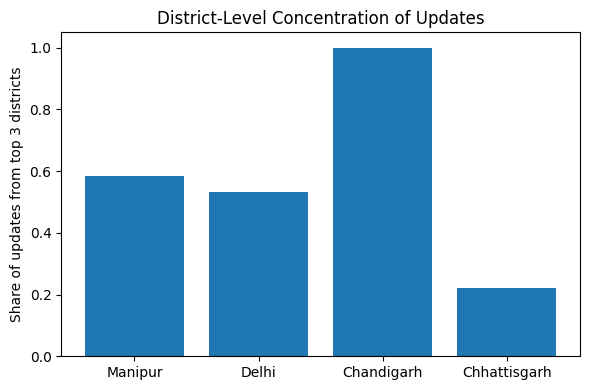

In [ ]:
#plotting district-level concentration of updates to try and figure out if few districts are contributing to most of the updates
concentration = []

for state in states_focus:
    temp = (
        df[df['state'] == state]
        .groupby('district')['total']
        .sum()
        .sort_values(ascending=False)
    )
    
    top3_share = temp.head(3).sum() / temp.sum()
    
    concentration.append({
        'state': state,
        'top3_share': top3_share
    })

concentration = pd.DataFrame(concentration)

plt.figure(figsize=(6, 4))

plt.bar(
    concentration['state'],
    concentration['top3_share']
)

plt.ylabel('Share of updates from top 3 districts')
plt.title('District-Level Concentration of Updates')

plt.tight_layout()
plt.show()
